In [257]:
%reset -f
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import numpy as np
import time

pd.set_option('display.max_rows', 100)
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.set_option("display.max_rows", 10, "display.max_columns", 10)
df = pd.read_csv(r"data/flashstake_data-2021-08-23.csv")
# df.set_index(['simulation', 'run', 'timestep', 'substep'])
print(df.columns)

Index(['FromAddress', 'StakeTransactionHash', 'StakeID', 'StakeDateTime',
       'AmountIn', 'MintedAmount', 'ExpireDateTime', 'TotalStakedDays',
       'DappRewardAmount', 'DappPoolAddress', 'UnstakeTransactionHash',
       'UnstakeDateTime', 'UnstakeEarlyBurnedAmount', 'MatchedAmount',
       'FlashVersion', 'V2MigrationTransactionHash'],
      dtype='object')


In [229]:
df['AmountIn'].describe()

count      1917.000000
mean      22093.194847
std       50969.409753
min           0.211450
25%        1800.000000
50%        5655.940636
75%       19815.551989
max      456971.000000
Name: AmountIn, dtype: float64

In [230]:
v_median = df['AmountIn'].median()
v_var = df['AmountIn'].var()
v_std = df['AmountIn'].std()
v_skew = df['AmountIn'].skew()
v_kurt = df['AmountIn'].kurt()

print("Median: {:,.2f}, Var: {:,.2f}, Std: {:,.2f}, Skew: {:,.2f}, Kurt: {:,.2f}".format(v_median, v_var, v_std, v_skew, v_kurt))

Median: 5,655.94, Var: 2,597,880,730.53, Std: 50,969.41, Skew: 5.42, Kurt: 36.71


In [231]:
df.corr()

,AmountIn,MintedAmount,TotalStakedDays,DappRewardAmount,UnstakeEarlyBurnedAmount,MatchedAmount,FlashVersion
AmountIn,1.000000,0.493165,-0.160397,0.140135,0.875481,0.331947,0.058548
MintedAmount,0.493165,1.000000,0.273902,0.307275,0.978159,0.595577,0.068655
TotalStakedDays,-0.160397,0.273902,1.000000,0.169104,0.125372,0.118999,0.000223
DappRewardAmount,0.140135,0.307275,0.169104,1.000000,-0.028451,0.354045,-0.106732
UnstakeEarlyBurnedAmount,0.875481,0.978159,0.125372,-0.028451,1.000000,0.418824,0.448612
MatchedAmount,0.331947,0.595577,0.118999,0.354045,0.418824,1.000000,-0.077918
FlashVersion,0.058548,0.068655,0.000223,-0.106732,0.448612,-0.077918,1.000000


In [232]:
df.cov()

,AmountIn,MintedAmount,TotalStakedDays,DappRewardAmount,UnstakeEarlyBurnedAmount,MatchedAmount,FlashVersion
AmountIn,2.597881e+09,3.168389e+08,-2.105766e+06,3.213530e+07,6.002116e+08,2.531279e+07,1468.096932
MintedAmount,3.168389e+08,1.588817e+08,8.892744e+05,1.602964e+07,2.848727e+08,1.123149e+07,425.738676
TotalStakedDays,-2.105766e+06,8.892744e+05,6.634466e+04,1.952023e+05,7.619523e+05,4.585729e+04,0.028310
DappRewardAmount,3.213530e+07,1.602964e+07,1.952023e+05,2.049806e+07,-3.837211e+06,2.430603e+06,-238.629672
UnstakeEarlyBurnedAmount,6.002116e+08,2.848727e+08,7.619523e+05,-3.837211e+06,5.326008e+08,1.246168e+07,4746.344407
MatchedAmount,2.531279e+07,1.123149e+07,4.585729e+04,2.430603e+06,1.246168e+07,2.238330e+06,-57.349711
FlashVersion,1.468097e+03,4.257387e+02,2.831042e-02,-2.386297e+02,4.746344e+03,-5.734971e+01,0.242029


In [233]:
df.iloc[0:10]

,FromAddress,StakeTransactionHash,StakeID,StakeDateTime,AmountIn,...,UnstakeDateTime,UnstakeEarlyBurnedAmount,MatchedAmount,FlashVersion,V2MigrationTransactionHash
0,0xee0be24481e9079ba33055b1af41c28660377d76,0x601cb3df68d0d0b6ac7af75a01a1d9ff510f4244d12f...,0xb5797b2fe6d0db876f743d679d9beb5b8efe0e8ee92c...,2021-08-23 23:12:01.000,49664.390056,...,NaN,NaN,0.000000,2,NaN
1,0xc848b603a557bef9dc9c3e8d9737691586b9e56b,0x1d84bc1c5e4460d6adfa9b6761c1ff9c956d60d59563...,0xc9676e788731728c31aae852764691555101d064a974...,2021-08-22 16:45:35.000,58231.291631,...,NaN,NaN,0.000000,2,NaN
2,0xb267a6cc3c4ef82326b802cfa7093c4be4c25c11,0x735758c23b10771a87d2a58c207900e84fb6c66cced4...,0x28c68ab41aa81c40e11a67b60ffe37e6b67ad0c6f08a...,2021-08-21 21:42:48.000,25838.668918,...,NaN,NaN,0.000000,2,NaN
3,0x4bf4e3a59add035c479cde89d98103cb65dca941,0x116fb6fdb55c97ee29c50b6887005d7830148f4750c2...,0x7c19a4a2b231f7e686dae840e1ea4899879dc885adfe...,2021-08-21 19:50:52.000,34837.356655,...,NaN,NaN,0.000000,2,NaN
4,0xda5b9c259ed8cd691eeac28206930fbbaf8a9574,0x38b1c3ec6df3cd78c3b76a56d5be58784f33ccb03952...,0xf7af930b74fa132376e4bea35f18d6f38bd6cfb14f22...,2021-08-21 11:20:12.000,2482.000000,...,NaN,NaN,24.813416,1,NaN
5,0x831b30b83ec283adcdb8148462cbff7e18e42f7c,0xf5defd87b8bbd62e71b63cb73769c43794d31c64c520...,0x3751fa38610c85ae2ada6baab15d4588edf559ee4db5...,2021-08-20 22:26:53.000,13758.325470,...,NaN,NaN,0.000000,2,NaN
6,0x7a7cc3923dcfa51b819d5be58fb7d590ea44706e,0x852fefbbbf135a6e79b5ff6c11daf565c8eba0ca67df...,0x3fdc43dd9e98c757d4c7348e233baf1baf7678164200...,2021-08-13 02:03:27.000,43185.179402,...,NaN,NaN,0.000000,2,NaN
7,0x911a6d66a2a60ceafb894cedf60cd00042f6300d,0xec029189e309bc33a5a0c302504a1a6f00eeae6c8f7e...,0x18d534deed1942c7e6f2ef5a033710343c81b1ce6b86...,2021-08-12 18:43:26.000,22214.310592,...,NaN,NaN,0.000000,2,NaN
8,0x5022e5906cd7eccc9c2f0c3d6b58e66ab0b0140f,0x629abb1f4d98f37474a141dda53dbe81cf0ae0f518c7...,0x202a70720a1212cfbf832ca08af728233fb58f64d0e5...,2021-08-10 05:19:29.000,13923.210382,...,NaN,NaN,0.000000,2,NaN
9,0xdb998468cf1c437c60a64373997041ac5ce446c9,0xb69e1d7af9a999a64161e840e62b264c23de4e33255b...,0x8d14d7946fa1b179696b47837c6edd924989c060a855...,2021-08-09 18:45:53.000,1264.000000,...,NaN,NaN,0.000000,2,NaN


In [258]:
print(df.columns)
print(df.dtypes)

Index(['FromAddress', 'StakeTransactionHash', 'StakeID', 'StakeDateTime',
       'AmountIn', 'MintedAmount', 'ExpireDateTime', 'TotalStakedDays',
       'DappRewardAmount', 'DappPoolAddress', 'UnstakeTransactionHash',
       'UnstakeDateTime', 'UnstakeEarlyBurnedAmount', 'MatchedAmount',
       'FlashVersion', 'V2MigrationTransactionHash'],
      dtype='object')
FromAddress                    object
StakeTransactionHash           object
StakeID                        object
StakeDateTime                  object
AmountIn                      float64
MintedAmount                  float64
ExpireDateTime                 object
TotalStakedDays               float64
DappRewardAmount              float64
DappPoolAddress                object
UnstakeTransactionHash         object
UnstakeDateTime                object
UnstakeEarlyBurnedAmount      float64
MatchedAmount                 float64
FlashVersion                    int64
V2MigrationTransactionHash     object
dtype: object


In [235]:
print(df.FromAddress.count())
df.groupby(['FromAddress'])
print(df.FromAddress.count())

1917
1917


In [242]:
df['StakeTimestamp'] = [datetime.datetime.timestamp(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f")) for d in df['StakeDateTime']]
df['UnstakeTimestamp'] = [0 if d!=d else datetime.datetime.timestamp(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f")) for d in df['UnstakeDateTime']]
df['StakeSeconds'] = df['UnstakeTimestamp'] - df['StakeTimestamp']
df['StakeTimestamp'].describe()
# df['UnstakeTimestamp'].describe()

count    1.917000e+03
mean     1.617312e+09
std      6.086974e+06
min      1.609531e+09
25%      1.611635e+09
50%      1.616230e+09
75%      1.621940e+09
max      1.629778e+09
Name: StakeTimestamp, dtype: float64

In [237]:
df['UnstakeEarlyBurnedAmount'].describe()

count       288.000000
mean      10273.783220
std       23078.145387
min           0.052143
25%        1341.703096
50%        3028.976028
75%        7260.666173
max      150639.852593
Name: UnstakeEarlyBurnedAmount, dtype: float64

In [245]:
# hodlers = df.query('UnstakeEarlyBurnedAmount != UnstakeEarlyBurnedAmount and StakeTimestamp < 1625101200 and AmountIn > 20000 and TotalStakedDays > 700')
# Staked time greater than 90 days, or is still staked since before July 1; with a staked amount greater than 200,000 tokens
hodlers = df.query('(UnstakeTimestamp - StakeTimestamp > 7776000 or (UnstakeTimestamp == 0 and StakeTimestamp < 1625101200)) and AmountIn > 100000')
hodlers_sorted = hodlers.sort_values(['AmountIn'], ascending=False)
print(hodlers_sorted[['FromAddress', 'AmountIn', 'TotalStakedDays']].to_string(index=False, header=True))
# hodlers[['FromAddress', 'AmountIn']]

                               FromAddress      AmountIn  TotalStakedDays
0x7dc0a282fcc494ef0ea59cba06f8709c04c1aee5 456871.120297             15.0
0x54e7452428ba68a3445356b44a6e1c11b73fe4b2 401184.000000             99.0
0xbe4c3b530b92157811ef87f53123753a9cf0012c 400000.000000            623.0
0x7842d81b5256e4baf390ce6a9c2a5ee83e7b094f 250000.000313             45.0
0x77342cdc64678df4261b273ad29da9e3c000decb 250000.000000            466.0
0x7f36ed45831bc34e38fd27145b6f983856fcb0dd 239000.000000             14.0
0x5da9ac2b36fe8415df9ac15e3fbee99de5dc000a 229104.900659             60.0
0x4658ff36ee90620646bb25a7ecdf0450d5fc8ef8 202294.920000             14.0
0x77342cdc64678df4261b273ad29da9e3c000decb 200000.000000            124.0
0x7407ca3def8bda3239fc7069863c54f2cc2c80bd 188093.750000            365.0
0x4c8475548d821e2e4d7f2e3bd2d83a32fff8131a 179146.179159            739.0
0xbe4c3b530b92157811ef87f53123753a9cf0012c 175000.000000            600.0
0x09ea768029069eeb979015a64f261e7789e5

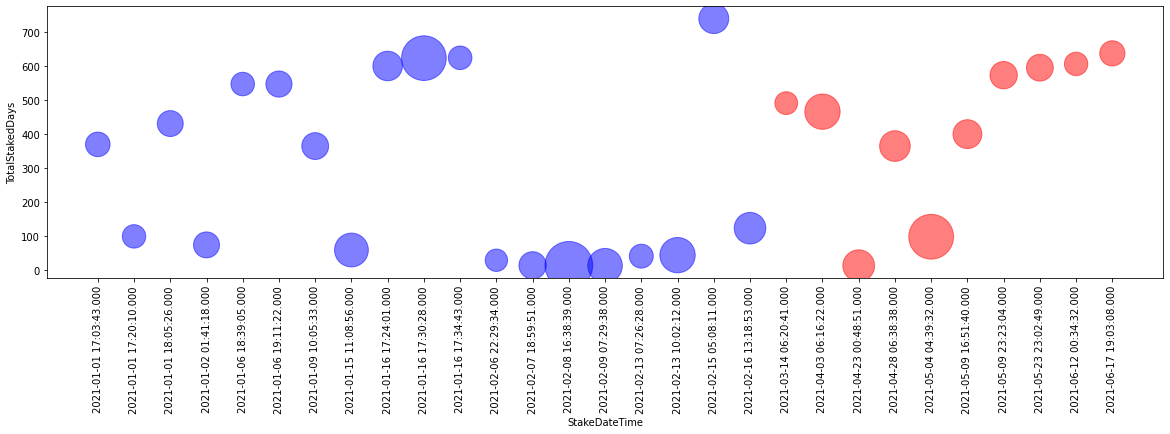

In [240]:
colors = ["Red" if v==2 else "Blue" for v in hodlers['FlashVersion']]
ax = hodlers.plot.scatter(x="StakeDateTime", y="TotalStakedDays", s=hodlers["AmountIn"] / 200, c=colors, rot=90, alpha=0.5, figsize=(20,5));
# ax.set_xticklabels(['{:%m-%d}'.format(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f").date()) for d in df['StakeDateTime']])
# ax.set_xticklabels(['{:%d-:%d}'.format(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f").month, datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f").day) for d in df['StakeDateTime']])
# ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
plt.gca().invert_xaxis()
plt.show()

In [10]:
# ax =  df[(df['simulation']==simulation_id) & (df['run']==i+1) & (df['timestep']>0)].plot(x='data', y=['px'], marker='o', markersize=2,
#                     markeredgewidth=4, alpha=0.8, markerfacecolor='black',
#                     linewidth=1, figsize=(12,8),  title="px vs. data", 
#                     ylabel='px', grid=True, fillstyle='none',  d
#                     xticks=list(range(1+np.int64(np.max(df[(df['simulation']==simulation_id)]['data'])))), legend=None,
#                     yticks=list(range(1+np.int64(np.max(df[(df['simulation']==simulation_id)]['px'])))), ax=ax);
# #                     yticks=list(range(1+(df[(df['simulation']==simulation_id)]['px']).max())), ax=ax);

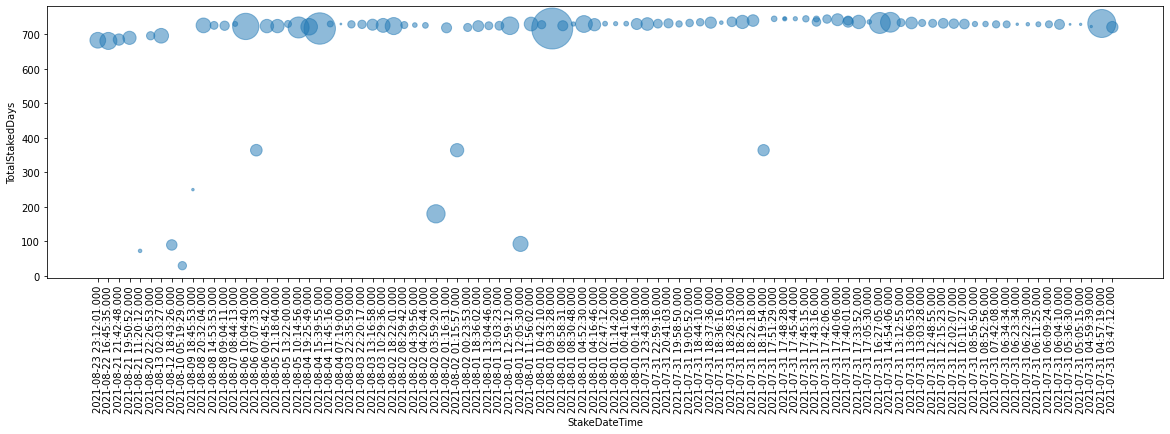

In [83]:
ax = df.iloc[0:100].plot.scatter(x="StakeDateTime", y="TotalStakedDays", s=df["AmountIn"].iloc[0:100] / 200, rot=90, alpha=0.5, figsize=(20,5));
# df.plot.scatter(x="StakeDateTime", y="TotalStakedDays", s=200);
# ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax.set_xticklabels([datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f").date() for d in df['StakeDateTime']])
plt.show()

/var/folders/mw/vqfb96ls3y9b6mkwqt0qgks40000gn/T/ipykernel_76100/70139358.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:%m-%d}'.format(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f").date()) for d in df['StakeDateTime']])


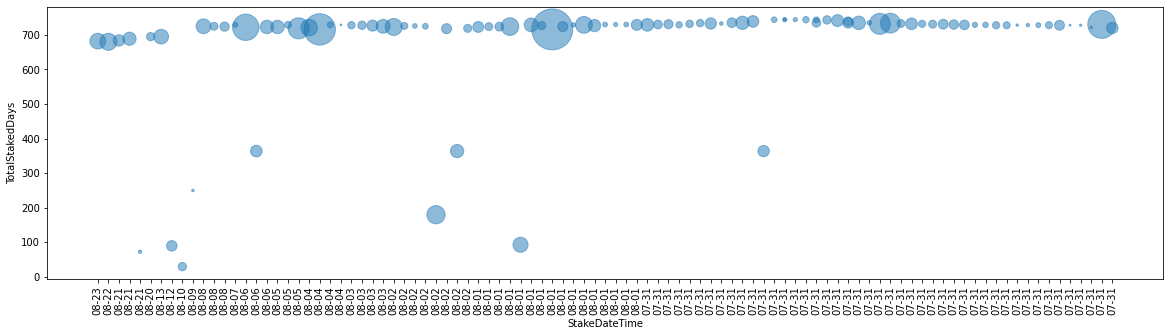

In [90]:
ax = df.iloc[0:100].plot.scatter(x="StakeDateTime", y="TotalStakedDays", s=df["AmountIn"].iloc[0:100] / 200, rot=90, alpha=0.5, figsize=(20,5));
# df.plot.scatter(x="StakeDateTime", y="TotalStakedDays", s=200);
ax.set_xticklabels(['{:%m-%d}'.format(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S.%f").date()) for d in df['StakeDateTime']])
plt.show()